<a href="https://colab.research.google.com/github/apetuhova/innopolis/blob/main/flask_client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flask приложение. Клиент.

1. Для тестирования работы модели запустить сервер в ноутбуке flask_server, заменить имя сервера в ячейке 4 этого ноутбука и выполнить команды
2. Для тестирования загрузки csv-файла перейти по ссылке [адрес_сервера]/web

In [71]:
import requests
import json
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
#задаем имя сервера flask
server='http://f566-35-231-105-170.ngrok.io'

In [73]:
#убедимся, что сервер работает
r = requests.get(server) 
print(r.status_code)
print(r.encoding)
print(r.apparent_encoding)
print(r.text)

200
utf-8
ascii
Hello World!


In [74]:
# Создадим массив случайных чисел 
x=np.random.rand(100)
# Создадим y как нелинейную функцию от x
y=x**2+1/x-np.log(x)*1/2*x**3

In [75]:
x[:5]

array([0.58512196, 0.28256061, 0.75977963, 0.72535034, 0.21359017])

In [76]:
y[:5]

array([2.10509421, 3.63316042, 1.95368301, 1.96604819, 4.73500519])

In [77]:
#обучим модель на сгенерированных данных
data_train = {'train_x': x.tolist(), 'train_y' : y.tolist()}
train_request = requests.post(server+'/train', json=json.dumps(data_train))

In [78]:
#получим коэффициенты полинома
poly=train_request.json()
poly

{'p': [-540.4903232998428,
  968.0180855343907,
  -515.1859366176781,
  77.91465945868656]}

In [79]:
#передадим данные и коэффициенты полученной модели на сервер и получим предсказанные данные
data_predict= {**{'x': x.tolist()}, ** poly}
predict_request = requests.post(server+'/predict', json=json.dumps(data_predict))
yp=predict_request.json()['prediction']
yp[:5]

[-0.38854395201373393,
 -2.5628895989670326,
 8.233972764713357,
 7.262963517284831,
 6.771112701717584]

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

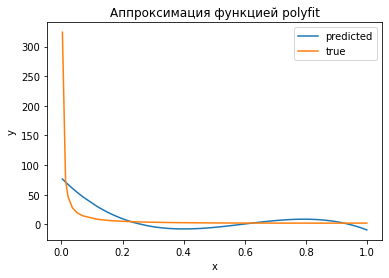

In [80]:
#построим графики исходных и предсказанных данных
ax=sns.lineplot(x=x,y=yp)
sns.lineplot(x=x,y=y)
ax.legend(labels=['predicted','true'])
ax.set_title('Аппроксимация функцией polyfit')
ax.set(xlabel="x", ylabel = "y")

In [81]:
#data_plot= {**{'x': x.tolist()},**{'y':y.tolist()}, ** {'ypred':yp}}